## Домашнее задание 2: Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается.

* Старайтесь сделать код как можно более оптимальным и читаемым.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [4]:
data = pd.read_csv('diamonds.csv').drop('Unnamed: 0', axis = 1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

**Задание 1 (1 балл)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [5]:
# your code here
if data.isnull().values.any() == True: # data.isnull().sum() > 0
    print('there are null elements')
    data.dropna()
else: 
    print('there are NO null elements')
data.head(5)

there are NO null elements


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 2 (1 балл)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование).

*Габариты* имеют наименьшую, если вообще имеют, добавленную стоимость. Качетсво алмаза определяется его ФХ-параметрами (степень обработки, примеси, масса, флоуресценция).  
[Extra source](http://www.diamondc.com.hk/us/factors-affect-diamond-price#:~:text=Factors%20Affecting%20Diamond%20Price&text=Colour%2C%20Clarity%2C%20Carat%20(size,from%205%25%20to%2030%25.)

In [6]:
# your code here
data = data.drop(['x', 'y', 'z'], axis = 1)
data.head(5)

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


**Задание 3 (1 балл)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками. Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какие вещественные признаки коррелируют с **целевой переменной** больше всего?

In [7]:
# your code here
numdata = data._get_numeric_data()
corr_df = numdata.corr()

In [8]:
corr_df

,carat,depth,table,price
carat,1.000000,0.028224,0.181618,0.921591
depth,0.028224,1.000000,-0.295779,-0.010647
table,0.181618,-0.295779,1.000000,0.127134
price,0.921591,-0.010647,0.127134,1.000000


<ipython-input-9-3e96443f424c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))


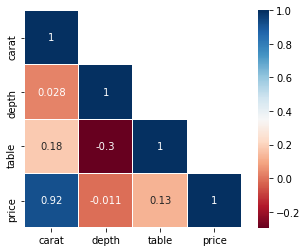

In [9]:
import seaborn as sns
colormap = plt.cm.RdBu
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
hmap=sns.heatmap(df_lt,linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Наибольшая зависимость по абсолютной величине у характеристик `price`&`carat`. В первом приближении, бОльшая масса означает бОльшую цену.

**Задание 4 (1 балл)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования (pd.get_dummies). Не забудьте поставить значение параметра drop_first равным True.

In [10]:
# your code here
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data.head()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задание 5 (1 балл)** 
Создайте матрицу X, содержащую все признаки, и не содержащую целевую переменную price. Также создайте вектор y, содержащий целевую переменную price.

In [11]:
# your code here
X = data.drop('price', axis = 1)
y = data['price']

**Задание 5 (1 балл)** 
Перемешайте данные! 

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [12]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [13]:
#Xtrain.head()

**Задание 6 (1 балл)** Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

После применения масштабирования матрица перестает быть объектом Pandas Dataframe - решите эту проблему.

[StandardScaler](https://pythonim.ru/libraries/funktsiya-standardscaler-v-python)

In [14]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler() 
#scal.fit_transform(X)
Xtrain_scal = pd.DataFrame(scal.fit_transform(Xtrain))
Xtest_scal = pd.DataFrame(scal.fit_transform(Xtest))
type(Xtest_scal)

pandas.core.frame.DataFrame

In [15]:
#Xtrain_scal.head()

**Задание 7 (1 балл)** Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках.

[R2_article](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)  

In [22]:
# оценка на основе МНК
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
mod1 = lr.fit(Xtrain_scal, ytrain) # linear model fit based on the train sample

pred_train = lr.predict(Xtrain_scal) # prediction of y's based on the X's for train
pred_test = lr.predict(Xtest_scal) # and for the test samples2
print("Train R2: {}".format(round(r2_score(ytrain, pred_train), 3))) # comparison of the actual answers and predicted ones for train
print("Test R2: {}".format(round(r2_score(ytest, pred_test), 3))) # and test samples

Train R2: 0.916
Test R2: 0.915


По критерию R2 качество *линейной* модели высокое.

**Задание 8 (1 балл)** Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите **вещественные переменные**, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных. [link](https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features)

In [23]:
coefficients = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(np.transpose(mod1.coef_))], axis = 1)
coefficients[:3]

,0,0
0,carat,4220.063864
1,depth,-37.392693
2,table,-61.848633


Влияние переменной `carat` на несколько порядков выше по абсолютной величине влияния иных ыещественных переменных.

### Оценим модель на основе `MAE` и `MSE`

In [25]:
# оценка на основе градиентного спуска
lr_mse = SGDRegressor(loss='squared_loss', max_iter=50000)
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000)

lr_mse.fit(Xtrain, ytrain)
lr_mae.fit(Xtrain, ytrain)

y_pred_mse = lr_mse.predict(Xtest)
y_pred_mae = lr_mae.predict(Xtest)

print(f'''MSE loss: 
mae={mean_absolute_error(ytest, y_pred_mse)}
mse={mean_squared_error(ytest, y_pred_mse)}
R2={r2_score(ytest, y_pred_mse)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(ytest, y_pred_mae)}
mse={mean_squared_error(ytest, y_pred_mae)}
R2={r2_score(ytest, y_pred_mae)}
''')


MSE loss: 
mae=8074386.550654206
mse=86644305954415.45
R2=-5456726.612990074

MAE loss: 
mae=1749.5400724553172
mse=9202862.1404393
R2=0.4204176326751805



По обоим критериям модель **переобучена** (огромные значения и большой отличие в residuals), R2 для первой модели и вовсе отрицательный.

## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие. Поэтому за каждое из них можно получить до двух баллов.

**Задание 9* (2 балла)** Как можно заметить из анализа корреляционной матрицы в задании 3 (между `table`&`depth`), между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц Xtrain и Xtest признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?
Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

**PS:** определяемая переменная (у) не рассматривается в коррелляционной матрице, т.к не является переменной.

In [27]:
# del table
Xtrain_del_tab = Xtrain.drop('table', axis = 1)
Xtest_del_tab = Xtest.drop('table', axis = 1)
# del depth
Xtrain_del_dep = Xtrain.drop('depth', axis = 1)
Xtest_del_dep = Xtest.drop('depth', axis = 1)

In [28]:
scal = StandardScaler() 
#scal.fit_transform(X)

# del table
Xtrain_del_tab_scal = pd.DataFrame(scal.fit_transform(Xtrain_del_tab))
Xtest_del_tab_scal = pd.DataFrame(scal.fit_transform(Xtest_del_tab))

# del depth
Xtrain_del_dep_scal = pd.DataFrame(scal.fit_transform(Xtrain_del_dep))
Xtest_del_dep_scal = pd.DataFrame(scal.fit_transform(Xtest_del_dep))
type(Xtrain_del_tab_scal)

pandas.core.frame.DataFrame

In [29]:
# without table
mod2 = lr.fit(Xtrain_del_tab_scal, ytrain)

pred_train = lr.predict(Xtrain_del_tab_scal)
pred_test = lr.predict(Xtest_del_tab_scal)

print("Train R2: {}".format(round(r2_score(ytrain, pred_train), 3))) # comparison of the actual answers and predicted ones for train
print("Test R2: {}".format(round(r2_score(ytest, pred_test), 3))) # and test samples

Train R2: 0.916
Test R2: 0.915


In [30]:
# without depth
mod3 = lr.fit(Xtrain_del_dep_scal, ytrain)

pred_train = lr.predict(Xtrain_del_dep_scal)
pred_test = lr.predict(Xtest_del_dep_scal)

print("Train R2: {}".format(round(r2_score(ytrain, pred_train), 3))) # comparison of the actual answers and predicted ones for train
print("Test R2: {}".format(round(r2_score(ytest, pred_test), 3))) # and test samples

Train R2: 0.916
Test R2: 0.915


Можно заметить, что удаление признаков `table` или `depth` не изменило базовый параметр качества (R2).

In [37]:
# del depth&carat
Xtrain_del = Xtrain.drop(['depth', 'table'], axis = 1)
Xtest_del = Xtest.drop(['depth', 'table'], axis = 1)

Xtrain_del_scal = pd.DataFrame(scal.fit_transform(Xtrain_del))
Xtest_del_scal = pd.DataFrame(scal.fit_transform(Xtest_del))
type(Xtrain_del_scal)

pandas.core.frame.DataFrame

In [119]:
mod_dep = lr.fit(Xtrain_del_scal, ytrain)

pred_train = lr.predict(Xtrain_del_scal)
pred_test = lr.predict(Xtest_del_scal)

print("Without `depth`&`table` variable.")
print("Train R2: {}".format(round(r2_score(ytrain, pred_train), 3)))
print("Test R2: {}".format(round(r2_score(ytest, pred_test), 3)))

Without `depth`&`table` variable.
Train R2: 0.916
Test R2: 0.915


Можно заметить, что удаление признаков `table` и/или `depth` не изменило базовый параметр качества (R2).

### Оценим модель на основе `MAE` и `MSE`

In [34]:
#lr_mse = SGDRegressor(loss='squared_loss', max_iter=50000)
#lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000)

### del table
lr_mse.fit(Xtrain_del_tab_scal, ytrain)
lr_mae.fit(Xtrain_del_tab_scal, ytrain)

y_pred_mse_dt = lr_mse.predict(Xtest_del_tab_scal)
y_pred_mae_dt = lr_mae.predict(Xtest_del_tab_scal)

print(f'''MSE loss: 
mae={mean_absolute_error(ytest, y_pred_mse_dt)}
mse={mean_squared_error(ytest, y_pred_mse_dt)}
R2={r2_score(ytest, y_pred_mse_dt)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(ytest, y_pred_mae_dt)}
mse={mean_squared_error(ytest, y_pred_mae_dt)}
R2={r2_score(ytest, y_pred_mae_dt)}
''')


MSE loss: 
mae=808.5067746475212
mse=1360742.8965909125
R2=0.9143024662011349

MAE loss: 
mae=876.0708132118777
mse=3052680.8468308235
R2=0.8077467678105535



In [35]:
### del depth
lr_mse.fit(Xtrain_del_dep_scal, ytrain)
lr_mae.fit(Xtrain_del_dep_scal, ytrain)

y_pred_mse_dd = lr_mse.predict(Xtest_del_dep_scal)
y_pred_mae_dd = lr_mae.predict(Xtest_del_dep_scal)

print(f'''MSE loss: 
mae={mean_absolute_error(ytest, y_pred_mse_dd)}
mse={mean_squared_error(ytest, y_pred_mse_dd)}
R2={r2_score(ytest, y_pred_mse_dd)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(ytest, y_pred_mae_dd)}
mse={mean_squared_error(ytest, y_pred_mae_dd)}
R2={r2_score(ytest, y_pred_mae_dd)}
''')

MSE loss: 
mae=806.7400985140991
mse=1357543.3443600489
R2=0.9145039691714113

MAE loss: 
mae=875.7455338130588
mse=3050736.199697798
R2=0.8078692387518509



Критерии качества по сравнению с исходной моделью стали лучше: меньшая разница между `MSE` и `MAE` и больший R2.

#### Удалим теперь из модели как `depth`, так и `table`

In [38]:
### del depth&table
lr_mse.fit(Xtrain_del_scal, ytrain)
lr_mae.fit(Xtrain_del_scal, ytrain)

y_pred_mse_ddt = lr_mse.predict(Xtest_del_scal)
y_pred_mae_ddt = lr_mae.predict(Xtest_del_scal)

print(f'''MSE loss: 
mae={mean_absolute_error(ytest, y_pred_mse_ddt)}
mse={mean_squared_error(ytest, y_pred_mse_ddt)}
R2={r2_score(ytest, y_pred_mse_ddt)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(ytest, y_pred_mae_ddt)}
mse={mean_squared_error(ytest, y_pred_mae_ddt)}
R2={r2_score(ytest, y_pred_mae_ddt)}
''')

MSE loss: 
mae=811.8332802672379
mse=1356918.0240224584
R2=0.9145433509024496

MAE loss: 
mae=876.0970957420906
mse=3053259.3654634664
R2=0.807710333580253



Без значительных изменений по сравнению с удалением переменных по отдельности.

### Cross-Validation

Для удобства рассмотрим модель без обоих признаков (последнюю):

In [48]:
from sklearn.model_selection import cross_validate

X_1 = X.drop(['table', 'depth'], axis = 1) #xyz удаляем, как и в самом начале

num_splits=8

cv_res = cross_validate(lr_mse,
                     X_1,
                     y,
                     scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"""test mse errors are {cv_res['test_neg_mean_squared_error']} 
and  mean mse = {cv_res['test_neg_mean_squared_error'].mean()}
""")

print(f"""test mae errors are {cv_res['test_neg_mean_absolute_error']} 
and  mean mae = {cv_res['test_neg_mean_absolute_error'].mean()}
""")


print(f"""test R2 are {cv_res['test_r2']} 
and  mean R2 = {cv_res['test_r2'].mean()}
""")


test mse errors are [ -999898.20618231  -998366.27434678 -1396838.71020599 -7110720.10005456
 -2385798.13868144  -583249.08285576  -570043.62455554  -705532.95813739] 
and  mean mse = -1843805.8868774704

test mae errors are [ -855.24156245  -842.74721438  -847.97885521 -2120.40061645
  -911.35394384  -579.64489338  -602.84135385  -718.16998149] 
and  mean mae = -934.7973026319203

test R2 are [ -0.05728594   0.41330509   0.66375567   0.57399254   0.91197664
 -19.2219419   -3.22086253  -1.12674665] 
and  mean R2 = -2.632975886394154



По кросс-валидации условно-подходящий критерий - это MAE. 

In [49]:
#X_1.head()

### Побробуем удалить признаки, связанные с размерами, но их производные: `depth`&`table`.

In [120]:
data_1 = pd.read_csv('diamonds.csv').drop('Unnamed: 0', axis = 1)
data_1 = data_1.drop(['depth', 'table'], axis = 1)
data_1.head(5)

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [121]:
# your code here
numdata_1 = data_1._get_numeric_data()
corr_df_1 = numdata_1.corr()

In [122]:
corr_df_1

,carat,price,x,y,z
carat,1.000000,0.921591,0.975094,0.951722,0.953387
price,0.921591,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.970772,0.952006,1.000000


<ipython-input-123-80073964fefb>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt_1 = corr_df_1.where(np.tril(np.ones(corr_df_1.shape)).astype(np.bool))


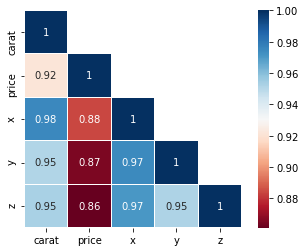

In [123]:
colormap = plt.cm.RdBu
df_lt_1 = corr_df_1.where(np.tril(np.ones(corr_df_1.shape)).astype(np.bool))
hmap=sns.heatmap(df_lt_1,linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Степень взаимозависимости сильно выше той, что была в предыдущей модели $\rightarrow$ такая модель не приоритетнее той, что уже есть.

In [124]:
data_1 = pd.get_dummies(data_1, columns=['cut', 'color', 'clarity'], drop_first=True)
data_1.head()

,carat,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [125]:
X_1 = data_1.drop('price', axis = 1)

In [126]:
Xtrain_1, Xtest_1, ytrain, ytest = train_test_split(X_1, y, test_size=0.3)

In [127]:
scal = StandardScaler() 
#scal.fit_transform(X)
Xtrain_scal_1 = pd.DataFrame(scal.fit_transform(Xtrain_1))
Xtest_scal_1 = pd.DataFrame(scal.fit_transform(Xtest_1))
type(Xtest_scal_1)

pandas.core.frame.DataFrame

In [128]:
lr = LinearRegression()
mod1 = lr.fit(Xtrain_scal_1, ytrain) # linear model fit based on the train sample

pred_train_1 = lr.predict(Xtrain_scal_1) # prediction of y's based on the X's for train
pred_test_1 = lr.predict(Xtest_scal_1) # and for the test samples

print("Train R2: {}".format(round(r2_score(ytrain, pred_train_1), 3))) # comparison of the actual answers and predicted ones for train
print("Test R2: {}".format(round(r2_score(ytest, pred_test_1), 3))) # and test samples

Train R2: 0.919
Test R2: 0.92


**Задание 10* (2 балла)** Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель (можно черпать идеи из ноутбука занятия 3). Помогло ли это улучшить качество модели?

Из имеющегося набора признаков можно попробовать преобразовать переменные `depth`&`table` в их отношение `d/t`

In [129]:
# your code here
data_2 = pd.read_csv('diamonds.csv').drop('Unnamed: 0', axis = 1)

data_2['d/t'] = (data_2['depth']/data_2['table'])
data_2 = data_2.drop(['depth', 'table', 'x', 'y', 'z'], axis = 1)
data_2.head(5)

,carat,cut,color,clarity,price,d/t
0,0.23,Ideal,E,SI2,326,1.118182
1,0.21,Premium,E,SI1,326,0.980328
2,0.23,Good,E,VS1,327,0.875385
3,0.29,Premium,I,VS2,334,1.075862
4,0.31,Good,J,SI2,335,1.091379


In [130]:
numdata_2 = data_2._get_numeric_data()
corr_df_2 = numdata_2.corr()
corr_df_2

,carat,price,d/t
carat,1.000000,0.921591,-0.127542
price,0.921591,1.000000,-0.104680
d/t,-0.127542,-0.104680,1.000000


<ipython-input-131-ceb22edf0005>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt_2 = corr_df_2.where(np.tril(np.ones(corr_df_2.shape)).astype(np.bool))


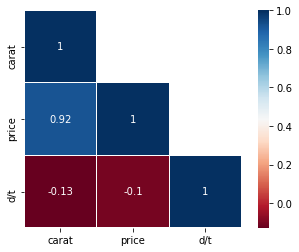

In [131]:
colormap = plt.cm.RdBu
df_lt_2 = corr_df_2.where(np.tril(np.ones(corr_df_2.shape)).astype(np.bool))
hmap=sns.heatmap(df_lt_2,linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [132]:
data_2 = pd.get_dummies(data_2, columns=['cut', 'color', 'clarity'], drop_first=True)
data_2.head()

,carat,price,d/t,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,1.118182,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,326,0.980328,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,327,0.875385,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,334,1.075862,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,335,1.091379,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [133]:
X_2 = data_2.drop('price', axis = 1)
Xtrain_2, Xtest_2, ytrain, ytest = train_test_split(X_2, y, test_size=0.3)

In [134]:
scal = StandardScaler() 
#scal.fit_transform(X)
Xtrain_scal_2 = pd.DataFrame(scal.fit_transform(Xtrain_2))
Xtest_scal_2 = pd.DataFrame(scal.fit_transform(Xtest_2))
type(Xtest_scal_2)

pandas.core.frame.DataFrame

In [135]:
lr = LinearRegression()
mod1 = lr.fit(Xtrain_scal_2, ytrain) # linear model fit based on the train sample

pred_train_2 = lr.predict(Xtrain_scal_2) # prediction of y's based on the X's for train
pred_test_2 = lr.predict(Xtest_scal_2) # and for the test samples

print("Train R2: {}".format(round(r2_score(ytrain, pred_train_2), 3))) # comparison of the actual answers and predicted ones for train
print("Test R2: {}".format(round(r2_score(ytest, pred_test_2), 3))) # and test samples

Train R2: 0.915
Test R2: 0.917


## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

Также (по желанию) напишите, была ли эта домашняя работа для вас интересной.

*В первом приближении по единственному коэффициенту R2, качество вышло ~0.92. Вообще говоря, это высокое качество, однако  модель, построенная на град. спуске показала сильно худшие значения. Улучшения качетсва удалось добиться, удалив `table` и/или `depth`.*

*Далее, используя Cross-Validation (bins = 8), получено, что состоятельный критерий для оценки только MAE (ближе к 0 и мЕньший разброс).*

Отличное ДЗ для старта: и вспомнить, и подумать.